# Latent Semantic Analysis demo  
---
Demo LSA  
Language: Julia  
Origin: Alex Thomo's [tutorial](https://pdfs.semanticscholar.org/3efd/a6e61747fea6b5cb5fa4f3ff0a14c86a638c.pdf)

In [1]:
using LinearAlgebra, TSVD

**Example Documents:**  
    d1:Romeo and Juliet.  
    d2:Juliet: O happy dagger!  
    d3:Romeo died by dagger.  
    d4:“Live free or die”, that’s the New-Hampshire’s motto.  
    d5:Did you know, New-Hampshire is in New-England.  

**Term-Document Matrix Example:**
![Doc-term matrix](images/matrix.png)

In [2]:
term_dict = Dict("romeo"=>1,"juliet"=>2,"happy"=>3, "dagger"=>4, "live"=>5,
                 "die"=>6, "free"=>7, "new-hampshire"=>8);
doc_dict = Dict("d1"=>1,"d2"=>2,"d3"=>3,"d4"=>4,"d5"=>5);

In [3]:
# Term-Document Matrix
A = [1 0 1 0 0;
     1 1 0 0 0;
     0 1 0 0 0;
     0 1 1 0 0;
     0 0 0 1 0;
     0 0 1 1 0;
     0 0 0 1 0;
     0 0 0 1 1]

8×5 Array{Int64,2}:
 1  0  1  0  0
 1  1  0  0  0
 0  1  0  0  0
 0  1  1  0  0
 0  0  0  1  0
 0  0  1  1  0
 0  0  0  1  0
 0  0  0  1  1

In [4]:
# Full Singular Value Decomposition
U,Σ,V = svd(A);

In [5]:
println("Left singular vectors")
U

Left singular vectors


8×5 Array{Float64,2}:
 -0.396153   0.280057  -0.571171    0.449685   -0.101839 
 -0.314268   0.449532   0.410591    0.513018    0.203906 
 -0.17824    0.268992   0.497321   -0.256998    0.0430523
 -0.438364   0.368508   0.0128792  -0.577329   -0.21964  
 -0.263881  -0.345921   0.145789    0.0474849   0.417484 
 -0.524005  -0.246405  -0.338652   -0.272846    0.154791 
 -0.263881  -0.345921   0.145789    0.0474849   0.417484 
 -0.326373  -0.459669   0.317003    0.237244   -0.724851 

In [6]:
println("Singular values")
Diagonal(Σ)

Singular values


5×5 Diagonal{Float64,Array{Float64,1}}:
 2.2853   ⋅        ⋅       ⋅        ⋅      
  ⋅      2.01026   ⋅       ⋅        ⋅      
  ⋅       ⋅       1.3607   ⋅        ⋅      
  ⋅       ⋅        ⋅      1.11814   ⋅      
  ⋅       ⋅        ⋅       ⋅       0.796577

In [7]:
println("Right singular vectors")
transpose(V)

Right singular vectors


5×5 Array{Float64,2}:
 -0.310866  -0.40733    -0.594461  -0.603046   -0.142814
  0.362933   0.540742    0.200054  -0.695391   -0.228662
 -0.118013   0.676704   -0.659179   0.198375    0.232971
  0.860986  -0.28736    -0.358175   0.0530948   0.212177
  0.128132   0.0342945  -0.209255   0.332558   -0.909958

In [8]:
U_2, Σ_2, V_2 = tsvd(A, 2);

In [9]:
U_2

8×2 Array{Float64,2}:
 -0.396153   0.280057
 -0.314268   0.449532
 -0.17824    0.268992
 -0.438364   0.368508
 -0.263881  -0.345921
 -0.524005  -0.246405
 -0.263881  -0.345921
 -0.326373  -0.459669

In [10]:
transpose(V_2)

2×5 Transpose{Float64,Array{Float64,2}}:
 -0.310866  -0.40733   -0.594461  -0.603046  -0.142814
  0.362933   0.540742   0.200054  -0.695391  -0.228662

In [11]:
# Low rank approximation
A_2 = U_2 * Diagonal(Σ_2) * transpose(V_2)

8×5 Array{Float64,2}:
  0.485762    0.673199  0.65081    0.154457    0.00056003
  0.551237    0.781199  0.607724  -0.195303   -0.104067  
  0.322878    0.45832   0.35032   -0.130389   -0.0654744 
  0.580283    0.808641  0.743726   0.0889825  -0.0263216 
 -0.0649144  -0.130389  0.219371   0.847233    0.245133  
  0.19249     0.219931  0.612777   1.0666      0.284286  
 -0.0649144  -0.130389  0.219371   0.847233    0.245133  
 -0.103507   -0.195863  0.258524   1.09237     0.317815  

In [12]:
# Terms matrix 
Term_Mat = U_2*Diagonal(Σ_2)

8×2 Array{Float64,2}:
 -0.905327   0.562988
 -0.718196   0.903676
 -0.40733    0.540742
 -1.00179    0.740797
 -0.603046  -0.695391
 -1.19751   -0.495337
 -0.603046  -0.695391
 -0.74586   -0.924053

In [13]:
# Document matrix
Doc_Mat = Diagonal(Σ_2)*transpose(V_2)

2×5 Array{Float64,2}:
 -0.710421  -0.930871  -1.35852   -1.37814  -0.326373
  0.72959    1.08703    0.402161  -1.39792  -0.459669

In [14]:
transpose(Doc_Mat)

5×2 Transpose{Float64,Array{Float64,2}}:
 -0.710421   0.72959 
 -0.930871   1.08703 
 -1.35852    0.402161
 -1.37814   -1.39792 
 -0.326373  -0.459669

**Example Query:** q = die , dagger

In [15]:
# Query representation
# die = [-1.19751   -0.495337]
# dagger = [-1.00179    0.740797]
die = Term_Mat[term_dict["die"],:]
dagger = Term_Mat[term_dict["dagger"],:]
q = (die + dagger)/2
q

2-element Array{Float64,1}:
 -1.0996494544510025
  0.1227299380591082

In [16]:
# Documents similarity ranking
# Ex: d1 [-0.710421 0.72959]
d1 = Doc_Mat[:,doc_dict["d1"]]
sim = dot(q,d1)/(norm(q)*norm(d1))

0.7727964887537568

![Documents and query similarity](images/doc_sim.png)

## Visualize words

In [17]:
using Plots; gr()

Plots.GRBackend()

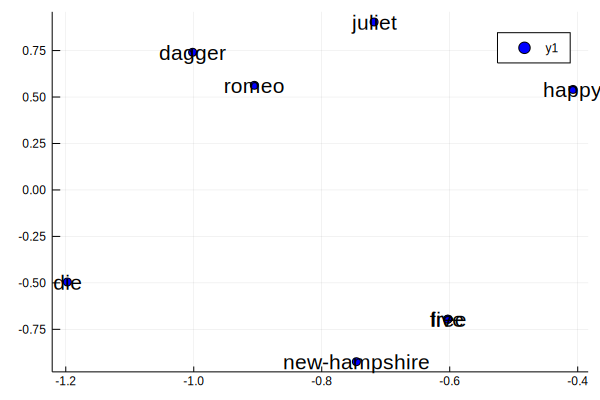

In [18]:
ys = Term_Mat
scatter(Term_Mat[:,1],Term_Mat[:,2],
    series_annotations=["romeo", "juliet", "happy", "dagger", "live", "die", "free", "new-hampshire"],
    c=:blue)